/home/flow3d-docker/out/SS316L_small_10_micron/0_0400_02.0_1.0E-4_1.0E-5/generate_melt_pool_dimensions.ipynb

In [13]:
import numpy as np
import os

import matplotlib.pyplot as plt

from skimage import measure

In [14]:
index = 100
key = "temperature"

In [15]:
COLUMNS_CONFIG = {
    "pressure": {
        "cmap": "viridis",
        "clim": [0, 10000],
        "title": "Pressure"
    },
    "temperature": {
        "cmap": "plasma",
        # "clim": [1873, 5000], # Ti-6Al-4V
        "clim":[1674, 3000], # SS316L
        "title": "Temperature"
    },
    "fraction_of_fluid": {
        "cmap": "viridis",
        "clim": [0, 1],
        "title": "Fraction of Fluid"
    },
    "liquid_label": {
        "cmap": "viridis",
        "clim": [0, 100],
        "title": "Liquid Label"
    },
}

In [16]:
configs = COLUMNS_CONFIG[key]

In [17]:
index_string = f"{index}".zfill(4)

# Width and Length dimensional measurements from "top-down" view
view_file = f"views/cross_section_xy/{key}/{index_string}.npz"

if os.path.exists(view_file):
    view_data = np.load(view_file)

    if os.path.exists(view_file):
        view_data = np.load(view_file)

        thresholded_data = np.copy(view_data["data"])
        thresholded_data[thresholded_data <= configs["clim"][0]] = 0
        thresholded_data[thresholded_data > configs["clim"][0]] = 1
        # thresholded_data_unique = np.unique(thresholded_data)

        # if len(thresholded_data_unique) > 1:




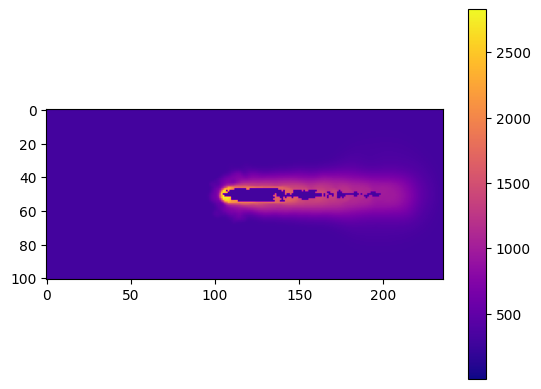

In [18]:
plt.figure()
plt.imshow(view_data["data"], cmap=configs["cmap"])
plt.colorbar()
plt.show()

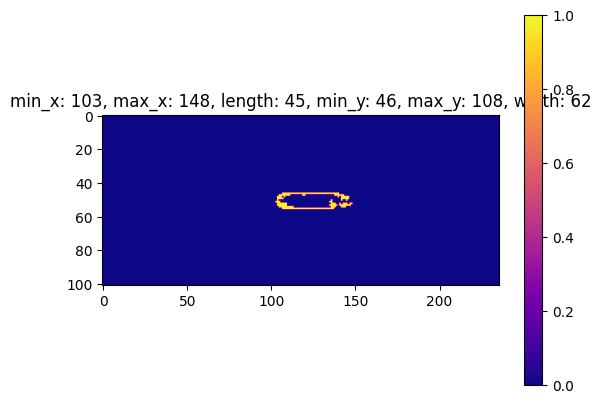

In [19]:
plt.figure()

indices = np.argwhere(thresholded_data == 1)
x_coords = indices[:, 1]
y_coords = indices[1, :]

min_x = x_coords.min()
max_x = x_coords.max()

min_y = y_coords.min()
max_y = y_coords.max()

plt.title(f"min_x: {min_x}, max_x: {max_x}, length: {max_x - min_x}, min_y: {min_y}, max_y: {max_y}, width: {max_y - min_y}")

plt.imshow(thresholded_data, cmap=configs["cmap"])
plt.colorbar()
plt.show()

not sure why max_y is 108 here

In [20]:
index_string = f"{index}".zfill(4)

# Width and Length dimensional measurements from "top-down" view
view_file = f"views/isometric/{key}/{index_string}.npz"

if os.path.exists(view_file):
    view_data = np.load(view_file)

    if os.path.exists(view_file):
        view_data = np.load(view_file)

        thresholded_data = np.copy(view_data["data"])
        thresholded_data[thresholded_data <= configs["clim"][0]] = 0
        thresholded_data[thresholded_data > configs["clim"][0]] = 1
        # thresholded_data_unique = np.unique(thresholded_data)

        # if len(thresholded_data_unique) > 1:




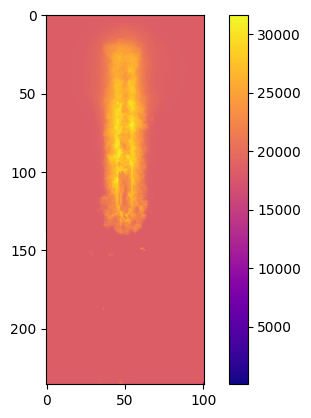

In [21]:
view_data_sum = np.sum(view_data["data"], axis = 2)
plt.figure()
plt.imshow(view_data_sum, cmap=configs["cmap"])
plt.colorbar()
plt.show()

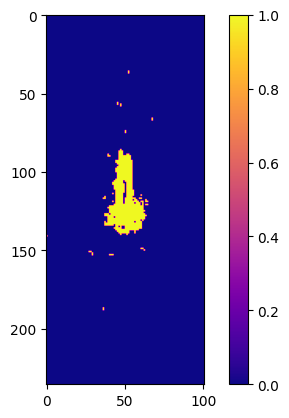

In [22]:
view_data_thresholded_sum = np.sum(thresholded_data, axis = 2)
view_data_thresholded_sum = np.where(view_data_thresholded_sum > 0, 1, 0)

plt.figure()
plt.imshow(view_data_thresholded_sum, cmap=configs["cmap"])
plt.colorbar()
plt.show()

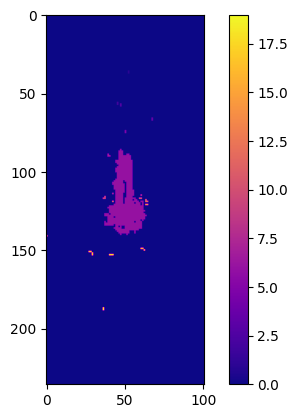

In [23]:
view_data_thresholded_sum_labeled = measure.label(view_data_thresholded_sum)

plt.figure()
plt.imshow(view_data_thresholded_sum_labeled, cmap=configs["cmap"])
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

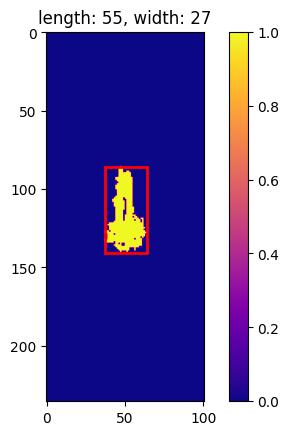

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import measure  # Assuming this is already imported

view_data_thresholded_sum_regionprops = measure.regionprops(view_data_thresholded_sum_labeled)

# Find the blob with the maximum area
blob_max_area = 0
for index, blob in enumerate(view_data_thresholded_sum_regionprops):
    if blob.area > blob_max_area:
        blob_max_area_index = index
        blob_max_area = blob.area

blob_max = view_data_thresholded_sum_regionprops[blob_max_area_index]
blob_max_label = blob_max.label

view_data_thresholded_sum_labeled_max = np.where(view_data_thresholded_sum_labeled == blob_max_label, 1, 0)

# Get the bounding box of the largest blob
min_row, min_col, max_row, max_col = blob_max.bbox
width = max_col - min_col
height = max_row - min_row

# Create the bounding box
rect = patches.Rectangle(
    (min_col, min_row),  # Bottom-left corner of the rectangle
    width,               # Width of the rectangle
    height,              # Height of the rectangle
    linewidth=2,         # Thickness of the rectangle edge
    edgecolor='red',     # Color of the rectangle edge
    facecolor='none'     # No fill color
)

# Plot the labeled max region with the bounding box
plt.figure()
fig, ax = plt.subplots()

ax.imshow(view_data_thresholded_sum_labeled_max, cmap=configs["cmap"])
ax.add_patch(rect)  # Add the rectangle to the plot

# Add a colorbar and show the plot
plt.title(f"length: {height}, width: {width}")
plt.colorbar(ax.imshow(view_data_thresholded_sum_labeled_max, cmap=configs["cmap"]))
plt.show()


<Figure size 640x480 with 0 Axes>

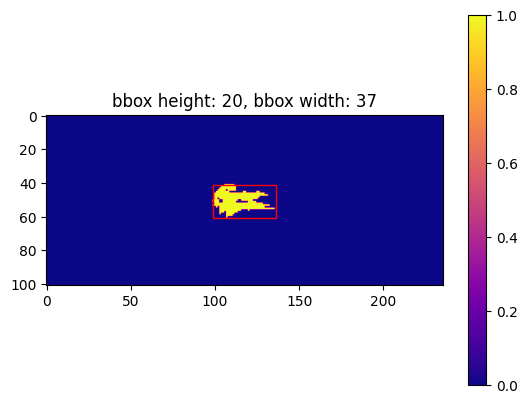

<Figure size 640x480 with 0 Axes>

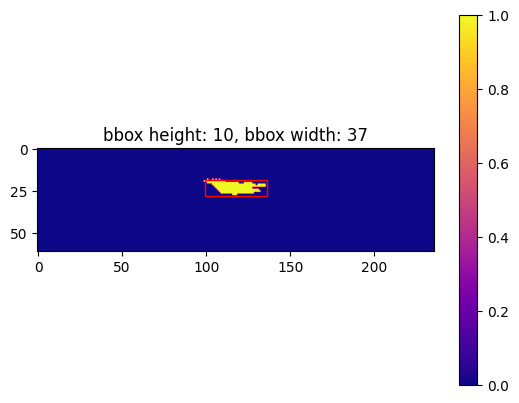

In [68]:
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from skimage import measure

index = 10
key = "temperature"

COLUMNS_CONFIG = {
    "pressure": {
        "cmap": "viridis",
        "clim": [0, 10000],
        "title": "Pressure"
    },
    "temperature": {
        "cmap": "plasma",
        # "clim": [1873, 5000], # Ti-6Al-4V
        "clim":[1697, 3000], # SS316L
        "title": "Temperature"
    },
    "fraction_of_fluid": {
        "cmap": "viridis",
        "clim": [0.5, 1],
        "title": "Fraction of Fluid"
    },
    "liquid_label": {
        "cmap": "viridis",
        "clim": [0, 100],
        "title": "Liquid Label"
    },
}

index = 100
key = "temperature"
# key = "pressure"
# key = "fraction_of_fluid"
configs = COLUMNS_CONFIG[key]
index_string = f"{index}".zfill(8)

# Width and Length dimensional measurements from "top-down" view
view_file = f"flslnk_npz/{index_string}.npz"

if os.path.exists(view_file):
    view_data = np.load(view_file)

    thresholded_data = np.copy(view_data[key]).squeeze()
    thresholded_data[thresholded_data <= configs["clim"][0]] = 0
    thresholded_data[thresholded_data > configs["clim"][0]] = 1
    thresholded_data_unique = np.unique(thresholded_data)

    if len(thresholded_data_unique) > 1:
        
        data_dict = {
            "index": index,
            # "mesh_size": self.mesh_size,
            # "power": power,
            # "velocity": velocity,
            "depth_m": None,
            "depth_px": None,
            "length_m": None,
            "length_px": None,
            "width_m": None,
            "width_px": None,
        }

        skimage_dict = {
            "bbox_xy": (None, None, None, None),
            "bbox_xz": (None, None, None, None),
            "labels_all_xy": None,
            "labels_all_xz": None,
            "labels_max_blob_xy": None,
            "labels_max_blob_xz": None,
        }

        # `0` is xy plane `1` is xz plane
        for axis in [0, 1]:
        
            # Sum data along axis and apply threshold and transformations
            thresholded_data_sum = np.sum(thresholded_data, axis = axis)
            thresholded_data_sum = np.where(thresholded_data_sum > 0, 1, 0)
            thresholded_data_sum = np.flip(thresholded_data_sum, axis=(0, 1))

            # Measure and label blob regions
            labels_all = measure.label(thresholded_data_sum)
            regionprops = measure.regionprops(labels_all)

            # Find the blob with the maximum area
            blob_max_area = 0
            for index, blob in enumerate(regionprops):
                if blob.area > blob_max_area:
                    blob_max_area_index = index
                    blob_max_area = blob.area

            blob_max = regionprops[blob_max_area_index]

            # Remove other smaller blobs
            labels_max_blob = np.where(labels_all == blob_max.label, 1, 0)

            # Get the bounding box of the largest blob
            min_row, min_col, max_row, max_col = blob_max.bbox
            bbox_width = max_col - min_col
            bbox_height = max_row - min_row

            if axis == 0:
                # data_dict["width_m"] = bbox_height * self.mesh_size
                data_dict["width_px"] = bbox_height
                # data_dict["length_m"] = bbox_width * self.mesh_size
                data_dict["length_px"] = bbox_width

                skimage_dict["bbox_xy"] = (min_row, min_col, max_row, max_col)
                skimage_dict["labels_all_xy"] = labels_all
                skimage_dict["labels_max_blob_xy"] = labels_max_blob

            if axis == 1:
                # data_dict["depth_m"] = bbox_height * self.mesh_size
                data_dict["depth_px"] = bbox_height

                skimage_dict["bbox_xz"] = (min_row, min_col, max_row, max_col)
                skimage_dict["labels_all_xz"] = labels_all
                skimage_dict["labels_max_blob_xz"] = labels_max_blob

            # Create the bounding box
            rect = patches.Rectangle(
                (min_col, min_row),  # Bottom-left corner of the rectangle
                bbox_width,               # Width of the rectangle
                bbox_height,              # Height of the rectangle
                linewidth=1,         # Thickness of the rectangle edge
                edgecolor='red',     # Color of the rectangle edge
                facecolor='none'     # No fill color
            )

            # Plot the labeled max region with the bounding box
            plt.figure()
            fig, ax = plt.subplots()

            ax.imshow(labels_max_blob, cmap=configs["cmap"])
            ax.add_patch(rect)  # Add the rectangle to the plot

            # Add a colorbar and show the plot
            plt.title(f"bbox height: {bbox_height}, bbox width: {bbox_width}")
            plt.colorbar(ax.imshow(labels_max_blob, cmap=configs["cmap"]))
            plt.show()